In [3]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#read data
diabetes = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/pima_indians_diabetes.csv")

#get to know the data
diabetes.info()
#top rows
diabetes.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies          768 non-null int64
glucose              768 non-null int64
blood_pressure       768 non-null int64
skin_thickness       768 non-null int64
insulin              768 non-null int64
bmi                  768 non-null float64
diabetes_pedigree    768 non-null float64
age                  768 non-null int64
outcome              768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#split up the diabetes
diabetes_yes = diabetes[(diabetes['outcome']==1)]
diabetes_yes.info()

diabetes_no = diabetes[(diabetes['outcome']== 0)]
diabetes_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 9 columns):
pregnancies          268 non-null int64
glucose              268 non-null int64
blood_pressure       268 non-null int64
skin_thickness       268 non-null int64
insulin              268 non-null int64
bmi                  268 non-null float64
diabetes_pedigree    268 non-null float64
age                  268 non-null int64
outcome              268 non-null int64
dtypes: float64(2), int64(7)
memory usage: 20.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 767
Data columns (total 9 columns):
pregnancies          500 non-null int64
glucose              500 non-null int64
blood_pressure       500 non-null int64
skin_thickness       500 non-null int64
insulin              500 non-null int64
bmi                  500 non-null float64
diabetes_pedigree    500 non-null float64
age                  500 non-null int64
outcome              500 non-null int64
dtypes: float

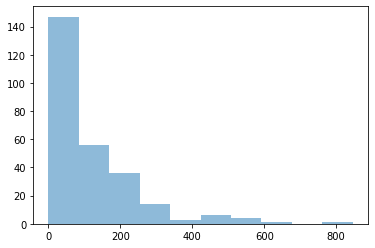

In [5]:
#identify insulin levels for the patients who have diabetes  
plt.hist(diabetes_yes['insulin'],alpha = .5)
plt.show()

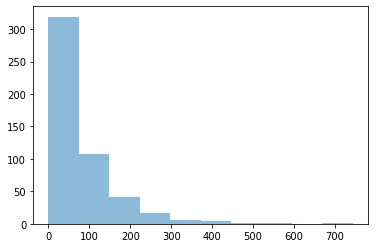

In [6]:
#identify insulin levels for the patients who have diabetes  
plt.hist(diabetes_no['insulin'],alpha=.5)
plt.show()

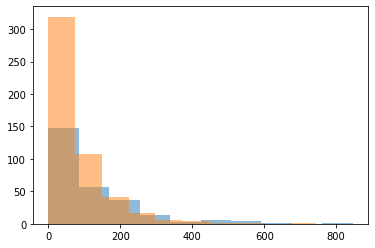

In [7]:
#plot histograms for the patients who have diabetes and ones who don't have
plt.hist(diabetes_yes['insulin'],alpha=.5)
plt.hist(diabetes_no['insulin'],alpha=.5)
plt.show()

In [14]:
#find skewness and kurtosis
print(stats.describe(diabetes_yes['insulin']))
print(stats.describe(diabetes_no['insulin']))

DescribeResult(nobs=268, minmax=(0, 846), mean=100.33582089552239, variance=19234.673318799265, skewness=1.8334954476833978, kurtosis=4.257259307676043)
DescribeResult(nobs=500, minmax=(0, 744), mean=68.792, variance=9774.345426853706, skewness=2.4912385539481763, kurtosis=9.35149885142989)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


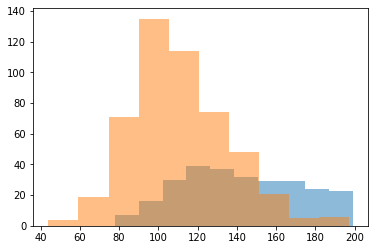

In [8]:
#Identify patients with higher glucose levels

diabetes_yes_filtered_glucose = diabetes_yes[(diabetes['glucose']!=0)]
diabetes_no_filtered_glucose = diabetes_no[(diabetes['glucose']!= 0)]

plt.hist(diabetes_yes_filtered_glucose['glucose'],alpha=0.5)
plt.hist(diabetes_no_filtered_glucose['glucose'],alpha = 0.5)
plt.show()


In [9]:
print(stats.describe(diabetes_yes_filtered_glucose['glucose']))
print(stats.describe(diabetes_no_filtered_glucose['glucose']))

DescribeResult(nobs=266, minmax=(78, 199), mean=142.31954887218046, variance=876.1125975315648, skewness=0.09012092392161705, kurtosis=-0.9626447554252175)
DescribeResult(nobs=497, minmax=(44, 197), mean=110.64386317907444, variance=613.8950882715649, skewness=0.6529596223112593, kurtosis=0.6434398312102663)


In [10]:
stats.ttest_ind(diabetes_yes_filtered_glucose['glucose'], diabetes_no_filtered_glucose['glucose'])

Ttest_indResult(statistic=15.700907488875874, pvalue=2.4782891993106313e-48)

In [12]:
def get_95_ci(array_1,array_2):
  sample_1_n = array_1.shape[0]
  sample_2_n = array_2.shape[0]
  sample_1_mean = array_1.mean()
  sample_2_mean = array_2.mean()
  sample_1_var = array_1.var()
  sample_2_var = array_2.var()

  mean_difference = sample_2_mean - sample_1_mean
  std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
  margin_of_error = 1.96 * std_err_difference

  ci_lower = mean_difference - margin_of_error
  ci_upper = mean_difference + margin_of_error
  return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(diabetes_yes_filtered_glucose['glucose'], diabetes_no_filtered_glucose['glucose'])


'The difference in means at the 95% confidence interval (two-tail) is between -35.846783869363435 and -27.504587516848602.'

[[Text(0, 0, 'diabetes_yes'), Text(0, 0, 'diabetes_no')]]

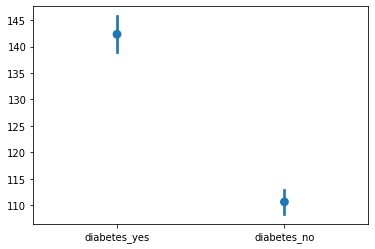

In [14]:
import seaborn as sns
g=sns.pointplot(data=[diabetes_yes_filtered_glucose['glucose'],diabetes_no_filtered_glucose['glucose']],join=False)
g.set(xticklabels =['diabetes_yes','diabetes_no'])
                       